<a href="https://colab.research.google.com/github/iamsachinrajput/mq4/blob/main/ml_predict_notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers.core import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
numpy.random.seed(7)

In [163]:
numpy.random.seed(7)
#df = pd.read_csv("https://raw.githubusercontent.com/iamsachinrajput/mq4/main/Files/mq4_data_to_csv_EURUSD_5_10000.txt",delimiter=";")
df=pd.read_csv("https://raw.githubusercontent.com/iamsachinrajput/mq4/main/Files/mq4_data_to_csv_GBPUSD_15_149292.txt",delimiter=";")

#df=df[:5000]
print(df.shape)
print(df.head(), df.columns,df.tail())


(149293, 31)
      Symbol         date time     open     high      low    close   close5  \
0  GBPUSD_15  2016.06.14 18:30  1.41390  1.41418  1.41236  1.41254  1.41417   
1  GBPUSD_15  2016.06.14 18:45  1.41254  1.41319  1.41210  1.41287  1.41357   
2  GBPUSD_15  2016.06.14 19:00  1.41286  1.41287  1.41102  1.41138  1.41472   
3  GBPUSD_15  2016.06.14 19:15  1.41138  1.41175  1.41095  1.41154  1.41477   
4  GBPUSD_15  2016.06.14 19:30  1.41151  1.41163  1.40997  1.41061  1.41390   

   close10  close15       AC  ...       MA     OsMA  MACD_GAP      OBV  \
0  1.41081  1.41287  0.00037  ...  4.58749  1.41360   0.00053  0.00036   
1  1.41010  1.41173  0.00005  ...  4.44715  1.41360   0.00036  0.00025   
2  1.41254  1.41116 -0.00036  ...  4.00671  1.41354   0.00025  0.00005   
3  1.41241  1.41138 -0.00077  ... -9.49132  1.41353   0.00005 -0.00008   
4  1.41302  1.41135 -0.00102  ...  3.45220  1.41354  -0.00008 -0.00023   

        SAR      RSI       RVI   STDDEV  Stochastic_GAP       WPR  

In [164]:
df.shape

(149293, 31)

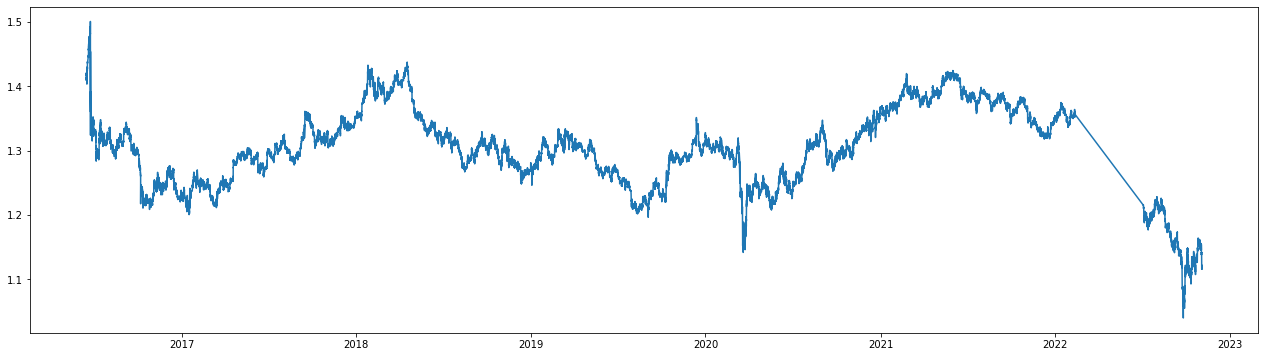

In [165]:
#visualise the data 
#import matplotlib.dates as mdates
#df=df[:3000]
date=pd.to_datetime(df['date time'])
value=df['close']

fig, ax = plt.subplots(figsize=(22, 6))
#ax.xaxis.set_major_formatter(year_month_formatter)
ax.plot(date, value);

In [166]:
# convert the data for scaler 

data=df.filter(['close'])
dataset=data.values
training_data_length=math.ceil(len(dataset)*.8)
training_data_length

119435

In [168]:
#scale the data to be just between 0 to 1 
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
#scaled_data.view()

In [169]:
## create training data from scaled data 
train_data=scaled_data[0:training_data_length,:]
train_data.shape


(119435, 1)

In [170]:
### create the training model 
x_train=[]
y_train=[]

for i in range(60,training_data_length):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()




[array([0.80895633, 0.80967266, 0.80643831, 0.80678562, 0.80476687,
       0.80392029, 0.80402883, 0.8045498 , 0.80296518, 0.80478857,
       0.80511418, 0.80591734, 0.80669879, 0.80533125, 0.80274811,
       0.80350786, 0.80483199, 0.80504906, 0.80615612, 0.80587393,
       0.80530954, 0.80552661, 0.80606929, 0.80585222, 0.80574368,
       0.80715464, 0.80724147, 0.80717635, 0.80563515, 0.80600417,
       0.806091  , 0.80515759, 0.8082617 , 0.80962924, 0.81077972,
       0.81034558, 0.81060606, 0.81054094, 0.81108362, 0.81219067,
       0.81223409, 0.81247287, 0.81223409, 0.8119736 , 0.81099679,
       0.81153946, 0.81077972, 0.81190848, 0.81275506, 0.81277676,
       0.81707476, 0.81855084, 0.81796475, 0.81679257, 0.81872449,
       0.81609794, 0.82083008, 0.81900669, 0.81889815, 0.82141617])]
[0.8240427194581921]

[array([0.80895633, 0.80967266, 0.80643831, 0.80678562, 0.80476687,
       0.80392029, 0.80402883, 0.8045498 , 0.80296518, 0.80478857,
       0.80511418, 0.80591734, 0.806

In [171]:
## change the shape of x_train data for training with LSTM as it needs 3 Dimnesional data but x_train is 2 d
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape


(119375, 60)

In [172]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(119375, 60, 1)

In [173]:
## create model for training 
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')



In [175]:
## train our model with our data  it will take time . 
model.fit(x_train,y_train,batch_size=100,epochs=2,verbose=1)


Epoch 1/2
1194/1194 [==============================] - 118s 99ms/step - loss: 2.1341e-05
Epoch 2/2
1194/1194 [==============================] - 114s 96ms/step - loss: 2.1043e-05


In [176]:
## now model is trained we will test how it predicts. 
## create test data first . 
test_data=scaled_data[training_data_length-60:,:]
x_test=[]
y_actual_value=dataset[training_data_length:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  
x_test[:5]

[array([0.74509421, 0.74416081, 0.74483372, 0.74585396, 0.74546323,
        0.74654858, 0.74541981, 0.74431276, 0.74544152, 0.744443  ,
        0.74379179, 0.74657029, 0.74861075, 0.74921855, 0.7469176 ,
        0.74505079, 0.74689589, 0.7506078 , 0.74778588, 0.7475254 ,
        0.7490666 , 0.74897977, 0.75121559, 0.75086828, 0.74904489,
        0.75017366, 0.74863246, 0.74685248, 0.74663541, 0.74337935,
        0.74296692, 0.74214205, 0.73994964, 0.7407528 , 0.74170791,
        0.74272814, 0.74235912, 0.74331423, 0.74324911, 0.74407398,
        0.74379179, 0.74363984, 0.74463836, 0.74485543, 0.74505079,
        0.7453764 , 0.74311887, 0.74288009, 0.74307545, 0.74242424,
        0.74296692, 0.7432274 , 0.74342277, 0.74363984, 0.74296692,
        0.74329252, 0.7435313 , 0.74426934, 0.74470348, 0.74411739]),
 array([0.74416081, 0.74483372, 0.74585396, 0.74546323, 0.74654858,
        0.74541981, 0.74431276, 0.74544152, 0.744443  , 0.74379179,
        0.74657029, 0.74861075, 0.74921855, 0.

In [177]:
# convert the testing data into numpy with required shape 
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape


(29858, 60, 1)

In [178]:
# now predict the data with our trained model 
scaled_predictions=model.predict(x_test)
predictions=scaler.inverse_transform(scaled_predictions)


934/934 [==============================] - 18s 18ms/step


In [179]:
## check how good prediction was with rmse calculation 
rmse=np.sqrt(np.mean(predictions-y_actual_value)**2)
rmse

0.0011111907164219573

In [180]:

## plot the data with predictions 
train=df[:training_data_length]
valid=df[training_data_length:]
valid['predictions']=predictions

pred=valid.filter(['date time','predictions'])
real=valid.filter(['date time','close'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [181]:

date_full=pd.to_datetime(df['date time'])
value_full=df['close']

date_pred=pd.to_datetime(pred['date time'])
value_pred=pred['predictions']


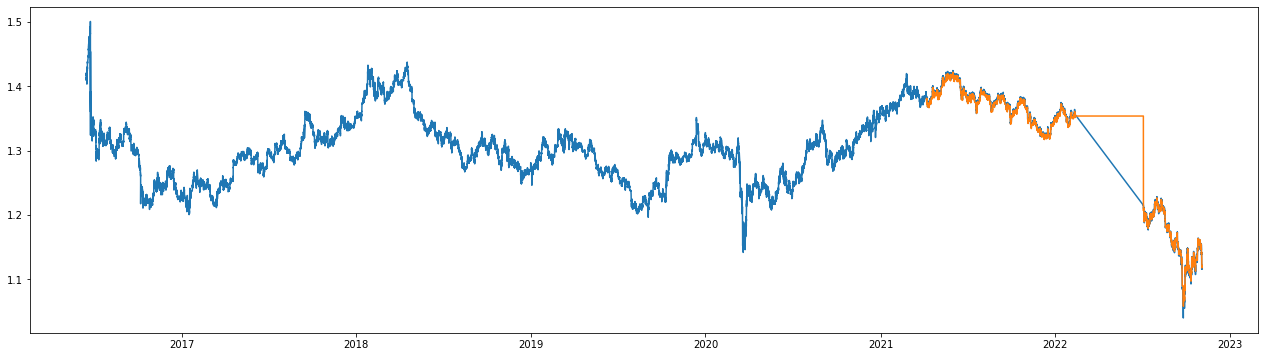

In [182]:
fig, ax = plt.subplots(figsize=(22, 6))
#ax.xaxis.set_major_formatter(year_month_formatter)
ax.plot(date_full, value_full)
ax.plot(date_pred, value_pred);
